<a href="https://colab.research.google.com/github/Vilash/machineLearning/blob/main/unsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Measuring Cluster Quality**
- Tight clusters is considered to be an example of **good clustering**
- **Inertia** measures tightness of a cluster (*lower* is better)
`model.inertia_`
- More cluster centroids leads to lesser Inertia
- But it's a trade-off
- Choose an "elbow" in inertia plot for choosing '# cluster centres'

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("white")


def showAsImage(image, length, width):
  bitmap = image.reshape(length, width)
  plt.imshow(bitmap, cmap='gray', interpolation='nearest')
  plt.colorbar()
  plt.show()

In [5]:
iris = datasets.load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [14]:
# grains = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt", sep='\t')
grains = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt", header=None, sep='\t+', engine='python')


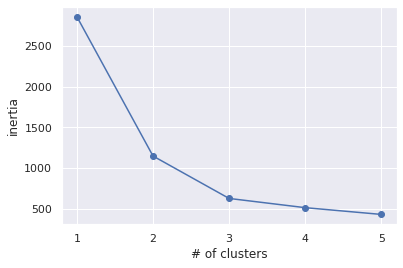

In [15]:
ks = range(1,6)
inertias = []
for k in ks:
  model = KMeans(k)
  model.fit(grains)
  inertias.append(model.inertia_)

_ = plt.plot(ks, inertias, '-o')
_ = plt.xlabel('# of clusters')
_ = plt.ylabel('inertia')
_ = plt.xticks(ks)

plt.show()

In [16]:
model = KMeans(3)

labels = model.fit_predict(grains)
varieties = grains[:][7]

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
# print(type(labels))
# print(type(varieties))

varieties   1   2   3
labels               
0          64  10   0
1           5   0  70
2           1  60   0


In [ ]:

# mergings = linkage(grains, method='complete')
# dendrogram(mergings, labels=list(varieties.values), leaf_rotation=90, leaf_font_size=6)
# # print(type([varieties]))
# # print(varieties.head())
# plt.show()

#

**Piedmont Wines Dataset**
- 178 samples with 3 varieties(Barolo, Grignolio, Barbera)
- Features measure chemical composition, visual properties




In [50]:
wines = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv", header='infer')
wines.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
model = KMeans(3)
wines_n = wines.drop(labels='class_name', axis=1)
labels = model.fit_predict(wines_n)
varieties = wines['class_name']

df = pd.DataFrame({'labels':labels,'varieties':varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               29      13          20
1                0      46           1
2               19       0          50


In KMeans: **feature variance = feature influence**

`StandardScaler`: transforms each feature to have variance 1 and mean 0


In [55]:
steps = [('scaler', StandardScaler()),
         ('kmeans', KMeans(3))]
pipeline = Pipeline(steps)        

labels = pipeline.fit_predict(wines_n)

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          68
1                0      59           2
2               48       0           1


**Fish Catch Dataset** 

In [36]:
fishes = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv", header=None)

In [37]:
fishes_n = fishes.drop(columns=0, axis=1)
species = fishes[:][0]
# species = fishes[[0]]
# print(type(species))
# print(fishes_n.head())
# print(species.head())
steps = [('scaler', StandardScaler()),
         ('kmeans', KMeans(4))]
pipeline = Pipeline(steps)

labels = pipeline.fit_predict(fishes_n)
# print(type(labels))
df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])

print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1           33     0      1      0
2            0     0      0     13
3            1     0     19      1


**Stocks Clustering based on day price difference**

In [8]:
stocks = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv", header='infer')
print(stocks.head())
stocks_n = stocks.drop(columns=stocks.columns[0], axis=1)
print(stocks_n.head())

stock_names = stocks.iloc[:,0]
print(type(stock_names))


         Unnamed: 0  2010-01-04  2010-01-05  ...  2013-10-25  2013-10-28  2013-10-29
0             Apple    0.580000   -0.220005  ...   -5.359962    0.840019  -19.589981
1               AIG   -0.640002   -0.650000  ...   -0.040001   -0.400002    0.660000
2            Amazon   -2.350006    1.260009  ...    4.790009   -1.760009    3.740021
3  American express    0.109997    0.000000  ...    1.849999    0.040001    0.540001
4            Boeing    0.459999    1.770000  ...    1.940002    1.130005    0.309998

[5 rows x 964 columns]
   2010-01-04  2010-01-05  2010-01-06  ...  2013-10-25  2013-10-28  2013-10-29
0    0.580000   -0.220005   -3.409998  ...   -5.359962    0.840019  -19.589981
1   -0.640002   -0.650000   -0.210001  ...   -0.040001   -0.400002    0.660000
2   -2.350006    1.260009   -2.350006  ...    4.790009   -1.760009    3.740021
3    0.109997    0.000000    0.260002  ...    1.849999    0.040001    0.540001
4    0.459999    1.770000    1.549999  ...    1.940002    1.130005    0

In [9]:
steps = [('normalizer', Normalizer()),
         ('kmeans', KMeans())]
pipeline = Pipeline(steps)

labels = pipeline.fit_predict(stocks_n)

df = pd.DataFrame({'labels':labels, 'stocks': stock_names})
print(df.sort_values('labels'))
# ct = pd.crosstab(df['labels'], df['stocks'])

# print(ct)


    labels                              stocks
40       0                      Procter Gamble
56       0                            Wal-Mart
38       0                               Pepsi
9        0                   Colgate-Palmolive
25       0                   Johnson & Johnson
54       0                            Walgreen
27       0                      Kimberly-Clark
1        1                                 AIG
18       1                       Goldman Sachs
3        1                    American express
5        1                     Bank of America
26       1                      JPMorgan Chase
55       1                         Wells Fargo
16       1                   General Electrics
10       2                      ConocoPhillips
53       2                       Valero Energy
12       2                             Chevron
35       2                            Navistar
57       2                               Exxon
44       2                        Schlumberger
24       3   

<class 'numpy.ndarray'>


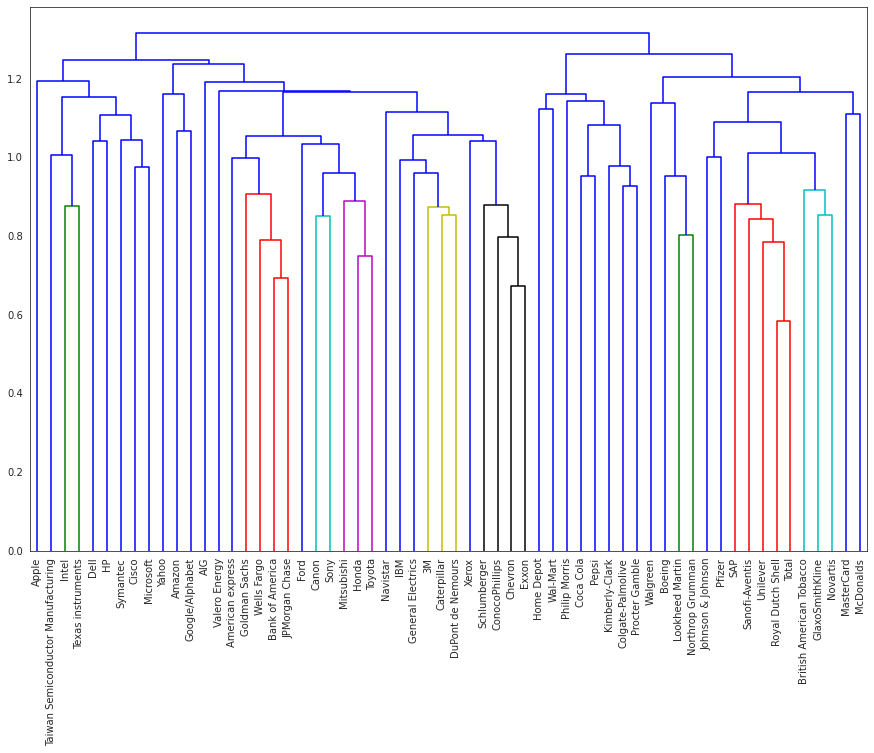

In [10]:
normalized_stocks = normalize(stocks_n)
print(type(normalized_stocks))
mergings = linkage(normalized_stocks, method='complete')
plt.figure(figsize=(15,10))
dendrogram(mergings, labels=list(stock_names), leaf_rotation=90, leaf_font_size=10)
plt.show()

# Visualization
To be able to communicate findings to non-technical audience


*   **t-SNE**: creates 2D map
*   **hierarchical clustering**

In [135]:
eurovisionSongs = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv", header='infer')
print(eurovisionSongs.head())
eurovisionScores = eurovisionSongs.drop(columns=['From country', 'To country'], axis=1)
countryNames = eurovisionSongs['To country']
# print(eurovisionScores.head())
# print(countryNames[:5])

  From country       To country  ...  Jury Points  Televote Points
0      Albania          Belgium  ...          NaN              NaN
1      Albania   Czech Republic  ...          NaN              NaN
2      Albania  The Netherlands  ...          NaN              NaN
3      Albania       Azerbaijan  ...          NaN              NaN
4      Albania          Hungary  ...          1.0              1.0

[5 rows x 11 columns]
   Jury A  Jury B  Jury C  ...  Televote Rank  Jury Points  Televote Points
0      20      16      24  ...             14          NaN              NaN
1      21      15      25  ...             22          NaN              NaN
2      22      14      23  ...             24          NaN              NaN
3      19      12      11  ...             19          NaN              NaN
4       8      13       9  ...             10          1.0              1.0

[5 rows x 9 columns]
0            Belgium
1     Czech Republic
2    The Netherlands
3         Azerbaijan
4            

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
eurovisionScoresImputed = imputer.fit_transform(eurovisionScores)
print(eurovisionScores.head())
print(eurovisionScoresImputed[:5])
mergings = linkage(eurovisionScoresImputed, method='complete')
plt.figure(figsize=(20,200))
dendrogram(mergings, labels=list(countryNames.values), leaf_font_size=6, orientation='right')

plt.show()

**t-SNE**: "t distributed stochastic neighbor embedding"
- maps higher dimensional samples to 2D space
- great for inspecting datasets

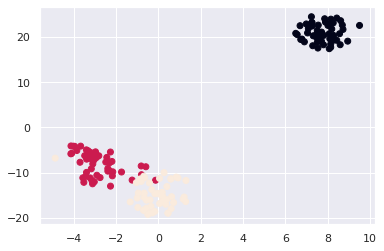

In [12]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(iris.data)
xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=iris.target)
plt.show()

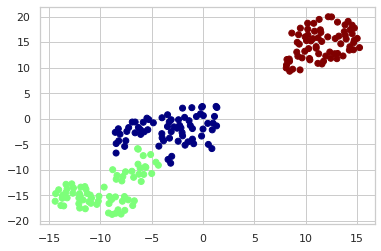

In [25]:
model = TSNE(learning_rate=200)
transformed = model.fit_transform(grains)
xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=varieties, cmap='jet')
plt.show()

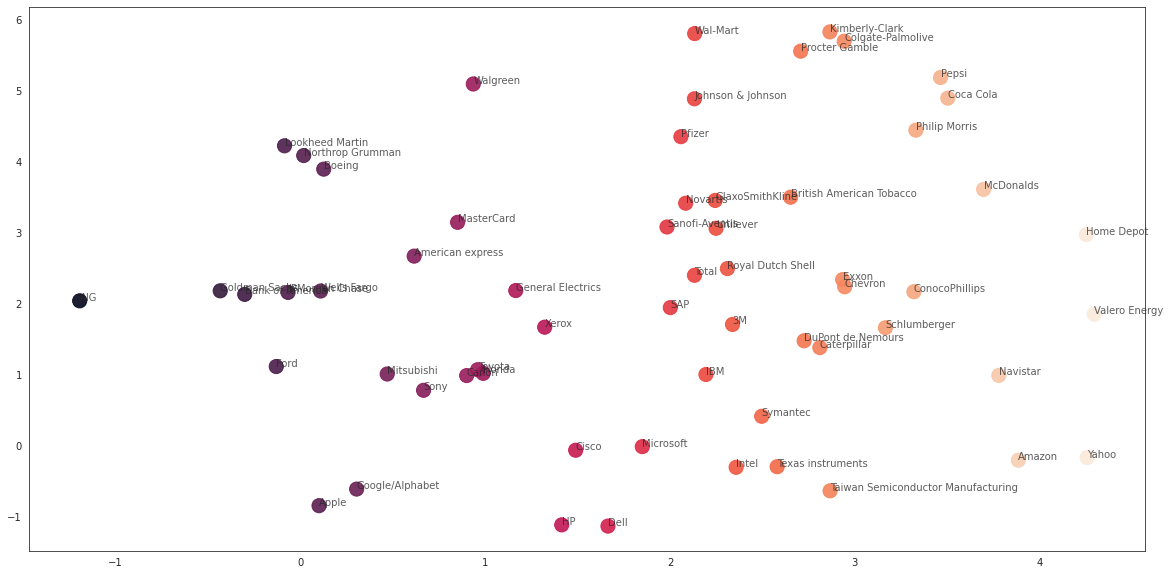

In [20]:
model = TSNE(learning_rate=50)

tsne_features = model.fit_transform(normalized_stocks)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.figure(figsize=(20,10))
plt.scatter(xs, ys, alpha=0.9, c=xs, s=200)

for x, y, company in zip(xs, ys, stock_names):
  plt.annotate(company,(x,y), fontsize=10, alpha=0.75)

plt.show()


# **Decorrelating data** & **Dimensionality reduction**
- finds patterns and re-expresses them in compressed form
- that results in efficient computation and storage
- helps remove **noise** features

**PCA** - Principal Component Analysis
1.   Decorrelation
2.   Dimension reduction

Decorrelation
- aligns axes by rotating data samples
- shifts data samples to mean 0

PCA decorrelates the data
- Linear Correlation is measured using PCA 

"**Principal components**" = direction of variance
PCA aligns principal components with axese i.e. it aligns variance with axes.

Pearson:(0.9943409310122264, 1.6197356569283355e-204)


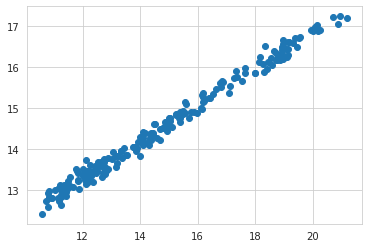

In [12]:

width = grains.iloc[:,0]
length = grains.iloc[:,1]

print('Pearson:{}'.format(pearsonr(width, length)))
_ = plt.scatter(width, length)
plt.show()

(-2.0552342051315373e-17, 0.999999999999971)


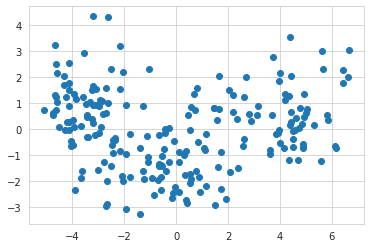

In [16]:
model = PCA()
pca_features = model.fit_transform(grains)
xs = pca_features[:, 0]
ys = pca_features[:, 1]

print(pearsonr(xs, ys))
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()


**Intrinsic Dimension**
- number of features needed to approximate the dataset.
- can be found using PCA

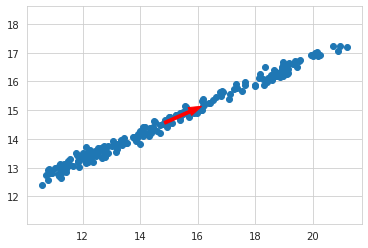

In [32]:
plt.scatter(grains.iloc[:,0], grains.iloc[:,1])
model = PCA()
model.fit(grains)
# print(grains.info())
mean = model.mean_
first_pc = model.components_[0,:]
# print(mean)
# print(model.components_)
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.1)

plt.axis('equal')
plt.show()


**Variance of PCA features**

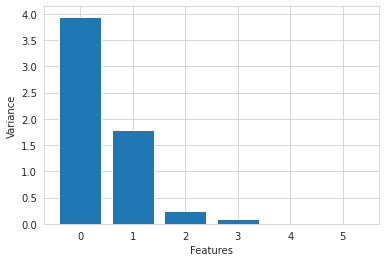

In [38]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(fishes_n)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.show()

**tf-idf word-frequency**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

tfidf = TfidfVectorizer()

csr_matrix = tfidf.fit_transform(documents)

# print(csr_matrix.to_array())

print(tfidf.get_feature_names())
print(documents)
print(csr_matrix)
print(csr_matrix.toarray())


['cats', 'chase', 'dogs', 'meow', 'say', 'woof']
['cats say meow', 'dogs say woof', 'dogs chase cats']
  (0, 3)	0.680918560398684
  (0, 4)	0.5178561161676974
  (0, 0)	0.5178561161676974
  (1, 5)	0.680918560398684
  (1, 2)	0.5178561161676974
  (1, 4)	0.5178561161676974
  (2, 1)	0.680918560398684
  (2, 2)	0.5178561161676974
  (2, 0)	0.5178561161676974
[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


# Discovering interpretable features
- Non-Negative Matrix Factorization, dimension reduction
- NMF models are interpretable
- sample features should be non-negative
- it decomposes samples

In [ ]:
digits = pd.read_csv("https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv", header=None)

model = PCA(n_components=7)

features = model.fit_transform(digits)

for component in model.components_:
  showAsImage(component, 13, 8)


In [ ]:

model = NMF(n_components=7)

features = model.fit_transform(digits)

for component in model.components_:
  showAsImage(component, 13, 8)